# Partie 2 : Interpolation polynômiale

#### But : effectuer des interpolations polynômiales d'un nuage de points quelconque

## 1. Setup général

In [1]:
#Importation des librairies
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [2]:
#Initialisation des variables globales
x = Symbol('x')
pas = 0.1
coordonnee = []
stop = False

In [3]:
#Fonction essentielle
def eval(f, t):return f.subs(x, t)

## 2. Méthode pour récupérer les coordonnées de nuages de points à la souris


In [5]:
#Fonction pour récupérer l'évenement "clic"
def onClick(event):
    try:
        x, y = event.xdata, event.ydata
        print(x, y)
        coordonnee.append((round(x, 2), round(y, 2)))
        plt.scatter(x, y, color="black", marker="x")
    except:
        print("Please click on the grid !")

In [6]:
#Fonction pour récupérer l'évenement "appuyer sur la touche entrée"
def onKey(event):
    global stop
    if (event.key == "enter"):
        stop = True

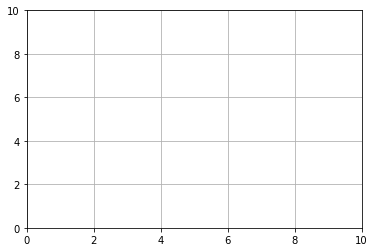

KeyboardInterrupt: ignored

In [9]:
fig, ax = plt.subplots()
ax.set(xlim=(0, 10), ylim=(0, 10))
ax.grid()

while True:
    key = fig.canvas.mpl_connect('key_press_event', onKey)
    click = fig.canvas.mpl_connect('button_press_event', onClick)
    plt.pause(1)
    if (stop):
        break

# 3. Méthode pour tracer le polynôme avec la matrice de Vandermone

# 4. Méthode pour tracer le polynôme avec l'interpolation de Lagrange

In [10]:
def Lk(x, k, coordonnee):
    result = 1
    for i in range(len(coordonnee)):
        if (i != k):
            result *= (x - coordonnee[i][0]) / (coordonnee[k][0] - coordonnee[i][0])
    return result

In [11]:
def polynomeLagrange(x, coordonnee):
    result = 0
    for k in range(len(coordonnee)):
        result += Lk(x, k, coordonnee) * coordonnee[k][1]
    return result

# 5. Interpolation de Newton via la matrice triangulaire et tablea des différences divisées

# 6. Tester les méthodes sur les exercices 5 et 6

In [15]:
coordonnee1 = [
               (1, 1), 
               (2, 8), 
               (3, 27),
               (4, 64)
               ]
coordonnee2 = [
               (1, 1), 
               (2, 3), 
               (4, 5),
               (6, 10),
               (7, 15)
               ]

##### Matrice Vandermonde

##### Interpolation de Lagrange

In [27]:
def tracer_lagrange(f, start, end, coordonnee):
    X = np.arange(start, end + pas, pas)
    Y = [ eval(f, x) for x in X ]
    plt.title("Function " + str(f))
    plt.plot(X, Y)
    for cooX, cooY in coordonnee:
        plt.scatter(cooX, cooY, color="black", marker="x")
    plt.axhline(0, color = "black")
    plt.axvline(0, color = "black")
    plt.grid()
    plt.show()

⎛4   x⎞ ⎛3   x⎞             ⎛    x⎞                              ⎛x   1⎞      
⎜─ - ─⎟⋅⎜─ - ─⎟⋅(2 - x) + 8⋅⎜2 - ─⎟⋅(3 - x)⋅(x - 1) + 27⋅(4 - x)⋅⎜─ - ─⎟⋅(x - 
⎝3   3⎠ ⎝2   2⎠             ⎝    2⎠                              ⎝2   2⎠      

        ⎛x   1⎞ ⎛x    ⎞        
2) + 64⋅⎜─ - ─⎟⋅⎜─ - 1⎟⋅(x - 3)
        ⎝3   3⎠ ⎝2    ⎠        


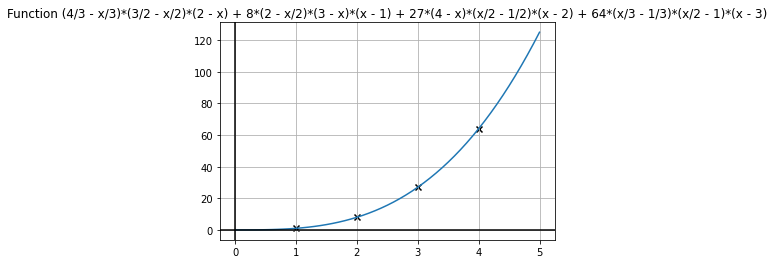

In [31]:
f1 = polynomeLagrange(x, coordonnee1)
pprint(f1, use_unicode=True)
tracer_lagrange(f1, 0, 5, coordonnee1)

⎛7   x⎞ ⎛6   x⎞ ⎛4   x⎞             ⎛7   x⎞ ⎛3   x⎞ ⎛    x⎞             ⎛7   x
⎜─ - ─⎟⋅⎜─ - ─⎟⋅⎜─ - ─⎟⋅(2 - x) + 3⋅⎜─ - ─⎟⋅⎜─ - ─⎟⋅⎜2 - ─⎟⋅(x - 1) + 5⋅⎜─ - ─
⎝6   6⎠ ⎝5   5⎠ ⎝3   3⎠             ⎝5   5⎠ ⎝2   4⎠ ⎝    2⎠             ⎝3   3

⎞ ⎛    x⎞ ⎛x   1⎞ ⎛x    ⎞              ⎛x   1⎞ ⎛x   1⎞ ⎛x    ⎞      ⎛x   1⎞ ⎛x
⎟⋅⎜3 - ─⎟⋅⎜─ - ─⎟⋅⎜─ - 1⎟ + 10⋅(7 - x)⋅⎜─ - ─⎟⋅⎜─ - ─⎟⋅⎜─ - 2⎟ + 15⋅⎜─ - ─⎟⋅⎜─
⎠ ⎝    2⎠ ⎝3   3⎠ ⎝2    ⎠              ⎝5   5⎠ ⎝4   2⎠ ⎝2    ⎠      ⎝6   6⎠ ⎝5

   2⎞ ⎛x   4⎞        
 - ─⎟⋅⎜─ - ─⎟⋅(x - 6)
   5⎠ ⎝3   3⎠        


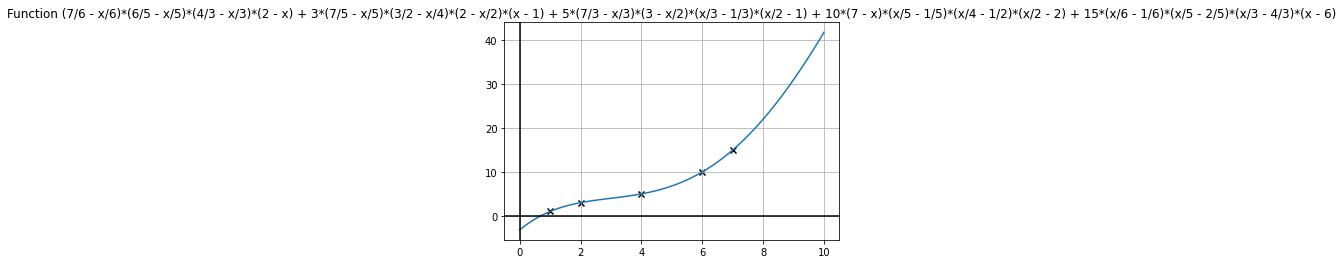

In [32]:
f2 = polynomeLagrange(x, coordonnee2)
pprint(f2, use_unicode=True)
tracer_lagrange(f2, 0, 10, coordonnee2)